In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from correlation_ansatzs import get_torus_correlation_ansatz,loglog

# Torus 2pt function best practice
- 1024x1024 torus
- 2^30 x 2^30 torus

fitted parameters: [0.16695094]
$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus


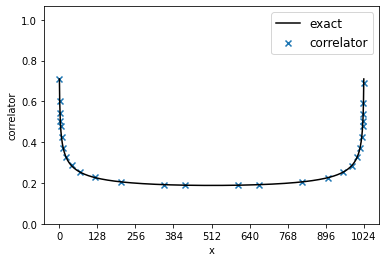

In [2]:
data01=pd.read_pickle('data/hotrg_X24_torus_correlation_y_10.pkl')
data01['x']=data01['x1']-data01['x0']
data1=data01[data01['y0']==0]


lattice_size=(1024,1024)
ansatz=get_torus_correlation_ansatz(lattice_size)
try:
    p,cov=curve_fit(ansatz,data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
except Exception as err:
    print('error',err)
    p,cov=None,None
print('fitted parameters:',p)
ls=np.linspace(1,1023,1023)

plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
plt.figure(figsize=(6,4))

plt.plot(ls,ansatz(ls,*p),'-',label='exact',color='black')


plt.scatter(data1['x'],data1['correlation'],marker='x',color='C0',label='correlator')

plt.xticks(np.arange(0,1025,128))
plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,data1['correlation'].max()*1.5])
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim([1e-2,1])
plt.legend()
print(r'$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus')
plt.show()

fitted parameters: [0.00505954]
$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus


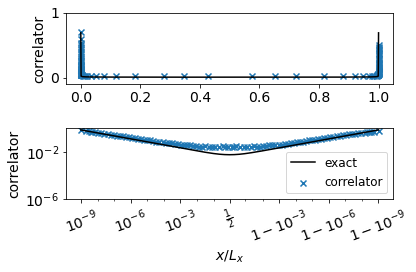

In [3]:

data1=pd.read_pickle('data/hotrg_X24_torus_correlation_30_00.pkl')
data1['x']=data1['x1']-data1['x0']

lattice_size=(2**30,2**30)

ansatz=get_torus_correlation_ansatz(lattice_size)

data_slice=data1[data1['correlation']>.1]
logX,logY=np.log(data1['x']),np.log(data1['correlation'])

p,cov=curve_fit(ansatz,data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
# p,cov=curve_fit(loglog(ansatz),data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
print('fitted parameters:',p)


ls=np.linspace(1,2**30-1,1024)


# plt.scatter(data1['x'],data1['correlation'],marker='x',color='black',label='correlation')


print(r'$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus')

plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
# plt.figure(figsize=(8,6))
axes=plt.subplot_mosaic('aa\nbb')[1]
plt.sca(axes['a'])
plt.plot(ls/2**30,ansatz(ls,*p),'-',color='black',label='exact')
plt.scatter(data1['x']/2**30,data1['correlation'],marker='x',color='C0',label='correlator')
#plt.xlabel(r'$x/L_x$')
plt.ylabel('correlator')
plt.ylim([-.1,1])
#plt.legend()

plt.sca(axes['b'])
plt.plot(ls/2**30,ansatz(ls,*p),'-',color='black',label='exact')
plt.scatter(data1['x']/2**30,data1['correlation'],marker='x',color='C0',label='correlator')
plt.xlabel(r'$x/L_x$')
plt.ylabel('correlator')
plt.ylim([1e-6,1])
plt.yscale('log')
plt.xscale('logit')
# rotate the x ticks
plt.xticks(rotation=20)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Comparision of different methods
- whether using gilt
- whether y=0 or at approximately middle

fitted parameters: [0.16695094]
$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus


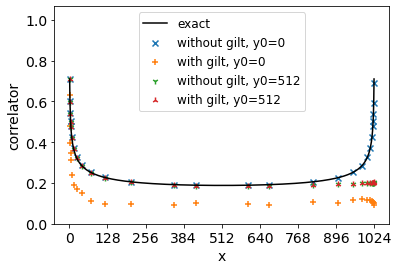

In [4]:
# data1=pd.read_pickle('data/hotrg_X24_torus_correlation_1024_00.pkl')
# data2=pd.read_pickle('data/hotrg_gilt_X24_torus_correlation_1024_00.pkl')

data01=pd.read_pickle('data/hotrg_X24_torus_correlation_y_10.pkl')
data02=pd.read_pickle('data/hotrg_gilt_X24_torus_correlation_y_10.pkl')
data03=pd.read_pickle('data/hotrg_X24_torus_correlation_y_mid_10.pkl')
data04=pd.read_pickle('data/hotrg_gilt_X24_torus_correlation_y_mid_10.pkl')

data01['x']=data01['x1']-data01['x0']
data02['x']=data02['x1']-data02['x0']
data03['x']=data03['x1']-data03['x0']
data04['x']=data04['x1']-data04['x0']
data1=data01[data01['y0']==0]
data2=data02[data02['y0']==0]
data3=data03[data03['y0']==512]
data4=data03[data03['y0']==512]


lattice_size=(1024,1024)
ansatz=get_torus_correlation_ansatz(lattice_size)
try:
    p,cov=curve_fit(ansatz,data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
except Exception as err:
    print('error',err)
    p,cov=None,None
print('fitted parameters:',p)
ls=np.linspace(1,1023,1023)


plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
plt.figure(figsize=(6,4))
plt.plot(ls,ansatz(ls,*p),'-',label='exact',color='black')


# plt.scatter(data1['x'],data1['correlation'],marker='x',color='black',label='correlation')

plt.scatter(data1['x'],data1['correlation'],marker='x',color='C0',label='without gilt, y0=0')
plt.scatter(data2['x'],data2['correlation'],marker='+',color='C1',label='with gilt, y0=0')
plt.scatter(data3['x'],data3['correlation'],marker='1',color='C2',label='without gilt, y0=512')
plt.scatter(data4['x'],data4['correlation'],marker='2',color='C3',label='with gilt, y0=512')

# x ticks 0-1023
plt.xticks(np.arange(0,1025,128))

plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,data1['correlation'].max()*1.5])
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim([1e-2,1])
plt.legend()
print(r'$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus')
plt.show()

# Scan along y

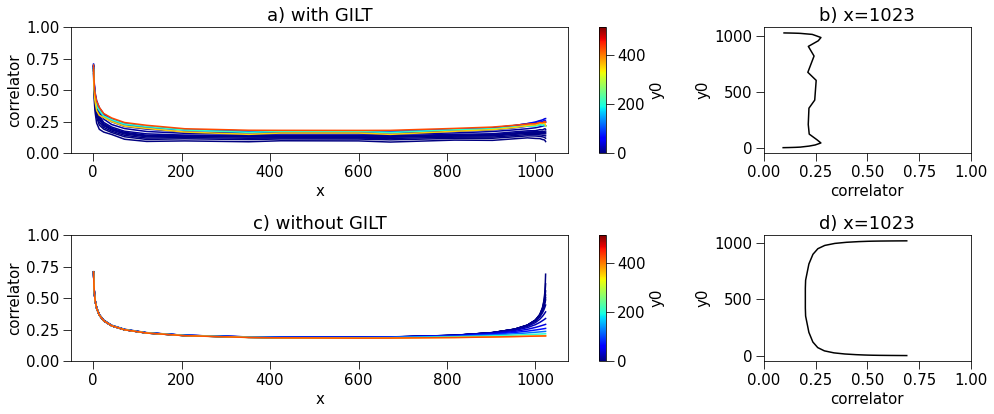

In [5]:

plt.rcParams.update({'font.size': 15,'legend.fontsize':10,'xtick.major.size':8,'ytick.major.size':8})
fig, axs = plt.subplots(2, 2,figsize=(14,6),gridspec_kw={'width_ratios': [3, 1]})
cmap=plt.get_cmap('jet')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0,vmax=512))
sm.set_array([])

ax=plt.subplot(221)

data=pd.read_pickle('data/hotrg_gilt_X24_torus_correlation_y_10.pkl')
data['x']=data['x1']-data['x0']

cmap=plt.get_cmap('jet')
for y0 in sorted(set(data['y0'])):
    if y0<512:
        data_sel=data[data['y0']==y0]
        plt.plot(data_sel['x'],data_sel['correlation'],'-',color=cmap(y0/512),label='y_0={}'.format(y0))
plt.title('a) with GILT')
plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,1])
cbar=plt.colorbar(sm)
cbar.set_label('y0')


plt.subplot(222)

data_sel=data[data['x1']==1023]
plt.plot(data_sel['correlation'],data_sel['y0'],'-',color='black')
plt.title('b) x=1023')
plt.ylabel('y0')
plt.xlabel('correlator')
plt.xlim([0,1])


plt.subplot(223)

data=pd.read_pickle('data/hotrg_X24_torus_correlation_y_10.pkl')
data['x']=data['x1']-data['x0']
for y0 in sorted(set(data['y0'])):
    if y0<512:
        data_sel=data[data['y0']==y0]
        plt.plot(data_sel['x'],data_sel['correlation'],'-',color=cmap(y0/512))

plt.title('c) without GILT')
plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,1])
cbar=plt.colorbar(sm)
cbar.set_label('y0')


plt.subplot(224)

data_sel=data[data['x1']==1023]
plt.plot(data_sel['correlation'],data_sel['y0'],'-',color='black')
plt.title('d) x=1023')
plt.ylabel('y0')
plt.xlabel('correlator')
plt.xlim([0,1])



plt.tight_layout()

plt.show()

